<a href="https://colab.research.google.com/github/vicalfayo09/steer_price_prediction_ml/blob/main/datasetloading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#from sklearn.linear_model import LinearRegression
#import pandas as pd
#import numpy as np
#from google.colab import files

#uploaded = files.upload()






In [85]:
#import io
#path = './home/alfayo/Downloads/weeklycattleprice_en.xlsx'
# Reading the data from the CSV file
#data = pd.read_excel(io.BytesIO(uploaded['weeklycattleprice_en.xlsx'])) 


In [86]:
#data.shape

In [87]:
#data.columns

In [88]:
#X , y = data.values[ : , 0 ] , data.values[ : , 1 ]
#X = np.expand_dims( X , axis=1 )

# Fitting the linear regression model
#regressor = LinearRegression()
#regressor.fit( X , y )

# Make predictions
#print( f'Prediction for 8.5 hours is {regressor.predict([[8.5]])[0]}' )

In [89]:
#uploaded2 = files.upload()

In [90]:
#data2 = pd.read_csv(io.BytesIO(uploaded2['AJA01.20221011194750.csv']))

In [91]:
#data2

In [92]:
#data2.head()

In [93]:
#data2[data2['Type of Cattle'].str.contains('Bu')].count()

In [94]:
#data2.count()

In [95]:
#data2['Type of Cattle'] = data2['Type of Cattle'].str.extract( r'\w(\d+\w)', expand=False ).split().astype(float)

In [96]:
#data2['Type of Cattle']

In [97]:
#import re
#bullock = "Bullocks 200-250kg"
#bullock_val_1 = re.findall('\w.(\d+[^A-Za-z]+\d+\w+)', bullock)

In [98]:
#bullock_val_1

In [99]:
#df = pd.DataFrame(data2)

In [100]:
#df

In [101]:
#initial_columns = df.columns
#initial_columns

In [102]:
#col_names = []
#for old in df.columns:
    #new = re.sub( r"[,]" ,'',old.strip()) 
    #new = re.sub( r"[\n\s/]" ,'_',new) 
    #col_names.append(new.lower()) 
#df.rename(columns=dict(zip(df.columns, col_names)), )

In [103]:
#for weight in df["Type of Cattle"]:
  #bullock_val_2 = re.findall('\w.(\d+[^A-Za-z]+\d+\w+)', weight)

In [104]:
#df.insert(6, "Weight", bullock_val_2, True)

**MAIN CODE**

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [106]:
pd.set_option('display.max_columns', None)

In [107]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [108]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [109]:
#https://drive.google.com/file/d/1yi6uL3islOb2a5XZEBmQlF1NnSRroMHT/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1yi6uL3islOb2a5XZEBmQlF1NnSRroMHT'})

In [110]:
fileDownloaded.GetContentFile('AJA01.20221011194750.csv')

In [111]:
import pandas as pd
df = pd.read_csv('AJA01.20221011194750.csv')

df.head()

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks 200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks 250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks 300-349kg,Euro,238.29
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks 350-399kg,Euro,270.47
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks 400-449kg,Euro,302.43


In [112]:
df.describe(include="all")

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
count,1288,1288,1288.000000,1288.000000,1288,1288,1288,1207.000000
unique,2,2,NaN,NaN,14,14,1,NaN
top,AJA01C1,Cattle Price per Head,NaN,NaN,B200,Bullocks 200-249kg,Euro,NaN
freq,644,644,NaN,NaN,92,92,1288,NaN
mean,NaN,NaN,1998.500000,1998.500000,NaN,NaN,NaN,369.926001
std,NaN,NaN,13.281075,13.281075,NaN,NaN,NaN,258.764418
min,NaN,NaN,1976.000000,1976.000000,NaN,NaN,NaN,46.240000
25%,NaN,NaN,1987.000000,1987.000000,NaN,NaN,NaN,154.950000
50%,NaN,NaN,1998.500000,1998.500000,NaN,NaN,NaN,228.073462
75%,NaN,NaN,2010.000000,2010.000000,NaN,NaN,NaN,560.516376


In [113]:
df.isna().sum()

STATISTIC CODE     0
Statistic          0
TLIST(A1)          0
Year               0
C01782V02140       0
Type of Cattle     0
UNIT               0
VALUE             81
dtype: int64

In [114]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


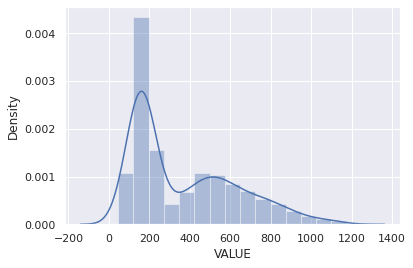

In [115]:
sns.distplot(df['VALUE'])

In [116]:
new = df['Type of Cattle'].str.split(" ", n = 1, expand=True)

In [117]:
df['Type of Cattle'] = new[0]
df.insert(6, "Weight", new[1])

In [118]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300-349kg,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350-399kg,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400-449kg,Euro,302.430000
...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250-299kg,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300-349kg,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350-399kg,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400-449kg,Euro,216.796269


In [119]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

x = df['Weight']
y = df['VALUE']
newprice = df.iloc[:, 8].values


In [120]:
price = newprice.reshape(-1, 1)
price

array([[         nan],
       [         nan],
       [238.29      ],
       ...,
       [216.96599474],
       [216.79626892],
       [         nan]])

In [121]:
#To calculate the median use imputer class
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer = imputer.fit(price)
y = imputer.transform(price)
print(y)

[[228.07346206]
 [228.07346206]
 [238.29      ]
 ...
 [216.96599474]
 [216.79626892]
 [228.07346206]]


In [122]:
df['VALUE'] = y

In [123]:
df.isna().sum()

STATISTIC CODE    0
Statistic         0
TLIST(A1)         0
Year              0
C01782V02140      0
Type of Cattle    0
Weight            0
UNIT              0
VALUE             0
dtype: int64

In [124]:
df['Type of Cattle'] = df['Type of Cattle'].replace("Cows", "Bullocks")
df['Weight'] = df['Weight'].replace("for slaughter", "550")

In [125]:
df.rename(columns = {'Weight': 'Weight in kg'}, inplace=True)

In [126]:
df['Weight in kg']
type(df['Weight in kg'])
df.dtypes

STATISTIC CODE     object
Statistic          object
TLIST(A1)           int64
Year                int64
C01782V02140       object
Type of Cattle     object
Weight in kg       object
UNIT               object
VALUE             float64
dtype: object

In [127]:
df['Weight in kg'] = df['Weight in kg'].str.replace('\D', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [128]:
new2 = df['Weight in kg'].str.split(" ", n = 1, expand=True)
split1 = df.insert(7, "Min Weight in kg", new2[0])
split2 = df.insert(8, "Max Weight in kg", new2[1])

In [129]:
data1 = df.copy()
data1['Min Weight in kg'] = pd.to_numeric(data1['Min Weight in kg'])


In [130]:
data1['Min Weight in kg'].dtypes

dtype('int64')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


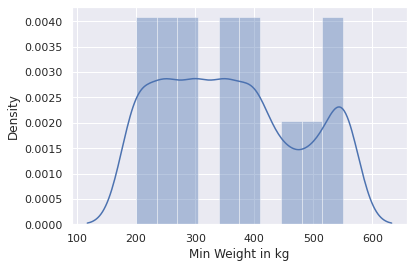

In [131]:
sns.distplot(data1['Min Weight in kg'])

In [132]:
data1['Min Weight in kg'] = data1['Min Weight in kg'].fillna(550)
data1['Max Weight in kg'] = pd.to_numeric(data1['Max Weight in kg'], errors= 'coerce')

In [133]:
data1

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight in kg,Min Weight in kg,Max Weight in kg,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200 249,200,249.0,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250 299,250,299.0,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300 349,300,349.0,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350 399,350,399.0,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400 449,400,449.0,Euro,302.430000
...,...,...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250 299,250,299.0,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300 349,300,349.0,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350 399,350,399.0,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400 449,400,449.0,Euro,216.796269


In [134]:
data1 = data1.dropna(axis = 0)

In [135]:
type(df['Max Weight in kg'].values)

numpy.ndarray

In [136]:
df.dropna(inplace=True,axis=0)

In [137]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight in kg,Min Weight in kg,Max Weight in kg,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200 249,200,249,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250 299,250,299,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300 349,300,349,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350 399,350,399,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400 449,400,449,Euro,302.430000
...,...,...,...,...,...,...,...,...,...,...,...
1282,AJA01C2,Cattle Price per 100 Kg,2021,2021,H200,Heifers,200 249,200,249,Euro,222.738691
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250 299,250,299,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300 349,300,349,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350 399,350,399,Euro,216.965995


In [138]:
#import sqlite3
#from sqlite3 import Error

In [139]:
#%load_ext sql

In [140]:
x = data1.iloc[:,7:9]
y = data1['VALUE']

In [141]:
x

,Min Weight in kg,Max Weight in kg
0,200,249.0
1,250,299.0
2,300,349.0
3,350,399.0
4,400,449.0
...,...,...
1282,200,249.0
1283,250,299.0
1284,300,349.0
1285,350,399.0


In [142]:
x['Max Weight in kg'] = x.iloc[:, 1].astype(int)

In [143]:
x

,Min Weight in kg,Max Weight in kg
0,200,249
1,250,299
2,300,349
3,350,399
4,400,449
...,...,...
1282,200,249
1283,250,299
1284,300,349
1285,350,399


In [144]:
x.shape

(1104, 2)

In [145]:
y.shape

(1104,)

Text(0.5, 1.0, 'Steer Price Data')

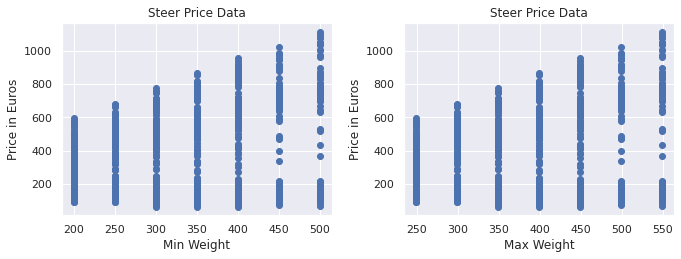

In [146]:
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,4))
fig.tight_layout(pad  = 3.0)
ax1.scatter(x.iloc[:,0],y)
ax1.set_xlabel("Min Weight")
ax1.set_ylabel("Price in Euros")
ax1.set_title("Steer Price Data")

ax2.scatter(x.iloc[:,1],y)
ax2.set_xlabel("Max Weight")
ax2.set_ylabel("Price in Euros")
ax2.set_title("Steer Price Data")

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=365)

In [148]:
x_train

,Min Weight in kg,Max Weight in kg
920,300,349
176,200,249
1130,300,349
522,400,449
960,200,249
...,...,...
304,300,349
499,250,299
1002,200,249
934,300,349


In [149]:
x_test

,Min Weight in kg,Max Weight in kg
1201,350,399
754,400,449
114,300,349
883,250,299
444,300,349
...,...,...
773,350,399
513,250,299
177,250,299
485,250,299


In [150]:
x_train.shape

(883, 2)

In [151]:
y_train.shape

(883,)

In [152]:
x_test.shape

(221, 2)

In [153]:
y_test.shape

(221,)

In [154]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [155]:
y_pred = knn_reg.predict(x_test)
y_pred

array([468.31453876, 613.98517184, 252.98678167, 243.578     ,
       252.98678167, 613.98517184, 252.98678167, 468.31453876,
       405.87185586, 405.87185586, 468.31453876, 405.87185586,
       468.31453876, 252.98678167, 334.68111535, 252.98678167,
       613.98517184, 243.578     , 613.98517184, 262.00104151,
       468.31453876, 613.98517184, 252.98678167, 468.31453876,
       405.87185586, 252.98678167, 468.31453876, 468.31453876,
       468.31453876, 613.98517184, 613.98517184, 405.87185586,
       252.98678167, 243.578     , 468.31453876, 252.98678167,
       262.00104151, 334.68111535, 252.98678167, 243.578     ,
       243.578     , 613.98517184, 468.31453876, 405.87185586,
       405.87185586, 468.31453876, 468.31453876, 468.31453876,
       613.98517184, 468.31453876, 252.98678167, 252.98678167,
       405.87185586, 334.68111535, 243.578     , 252.98678167,
       468.31453876, 262.00104151, 405.87185586, 243.578     ,
       468.31453876, 405.87185586, 468.31453876, 613.98

In [156]:
#x_train = x_train[:-883]
#y_train = y_train[-883:]
#x_test = x_test[:-221]
#y_test = y_test[-221:]

In [157]:
x_train.shape

(883, 2)

In [158]:
y_train.shape

(883,)

In [159]:
x_test.shape

(221, 2)

In [160]:
y_test.shape

(221,)

In [172]:
x_train.dtypes

Min Weight in kg    int64
Max Weight in kg    int64
dtype: object

Text(0.5, 1.0, 'Testing Data')

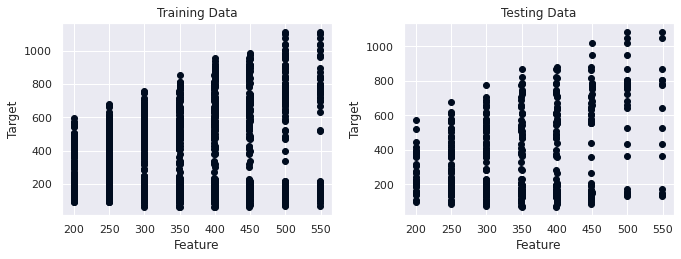

In [182]:
fig2, (ax3, ax4) = plt.subplots(1,2, figsize =(10,4))
fig2.tight_layout(pad  = 3.0)
ax3.scatter(x_train['Min Weight in kg'], y_train, color='#000C1F')
ax3.set_xlabel("Feature")
ax3.set_ylabel("Target")
ax3.set_title("Training Data")

ax3.scatter(x_train['Max Weight in kg'], y_train, color='#000C1F')
ax3.set_xlabel("Feature")
ax3.set_ylabel("Target")
ax3.set_title("Training Data")

ax4.scatter(x_test['Min Weight in kg'], y_test, color='#000C1F')
ax4.set_xlabel("Feature")
ax4.set_ylabel("Target")
ax4.set_title("Testing Data")

ax4.scatter(x_test['Max Weight in kg'], y_test, color='#000C1F')
ax4.set_xlabel("Feature")
ax4.set_ylabel("Target")
ax4.set_title("Testing Data")




In [183]:
mse = mean_squared_error(y_test,y_pred)

In [184]:
mse

78926.83151183501

In [ ]:
#fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,40,80)
y_pred_knn=[] # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(x_train,y_train)
    y_knn_pred=model_knn.predict(x_test)
    y_pred_knn.append(y_knn_pred)
#Storing MSE 
    #mse=mean_squared_error(y_test,y_knn_pred)
    #knn_dict[i]=mse
#Plotting the results
#ax.plot(knn_dict.keys(),knn_dict.values())
#ax.set_xlabel('K-VALUE', fontsize=20)
#ax.set_ylabel('MSE' ,fontsize=20)
#ax.set_title('ELBOW PLOT' ,fontsize=28)

#Now you know why we call it an elbow plot and it clearly shows our MSE is minimum when k=9. Hurrah!

#We build our model similar to the way we did above and we just substitute the value of n_neighbors as 9 while doing that. Let’s see the results.

#The mean Square error turns out to be 

#Sort the data according to the test features#